# Model Selection

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

In [2]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [3]:
# ADF test

def adf_test(series):
    results = adfuller(series)
    print("ADF statistic: %f"% results[0])
    print("P value: %f"% results[1])

In [4]:
#get the data

series = pd.read_csv("catfish.csv",parse_dates = [0],index_col = 0,squeeze = True,date_parser = parser )

In [5]:
series

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Name: Total, Length: 324, dtype: int64

In [6]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

Text(0, 0.5, 'Sales')

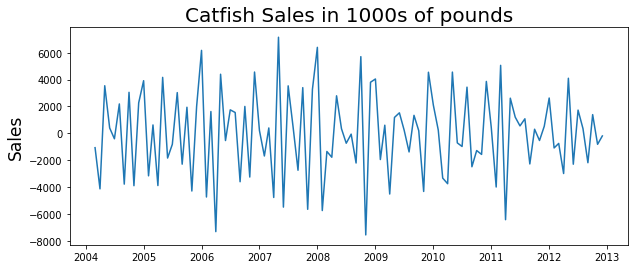

In [7]:
plt.figure(figsize = (10,4))
plt.plot(series)

plt.title("Catfish Sales in 1000s of pounds", fontsize = 20)
plt.ylabel("Sales", fontsize = 17)

In [8]:
#check stationary

adf_test(series)

ADF statistic: -7.162321
P value: 0.000000


**From the plot and the adf test we can say that the time series is Stationary**

# PACF Plot

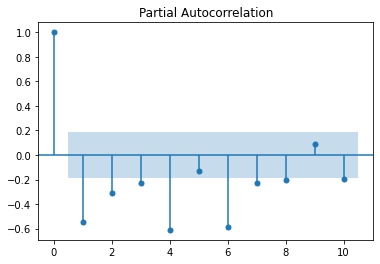

In [10]:
plot_pacf(series,lags = 10)
plt.show()

# FIT AR Model

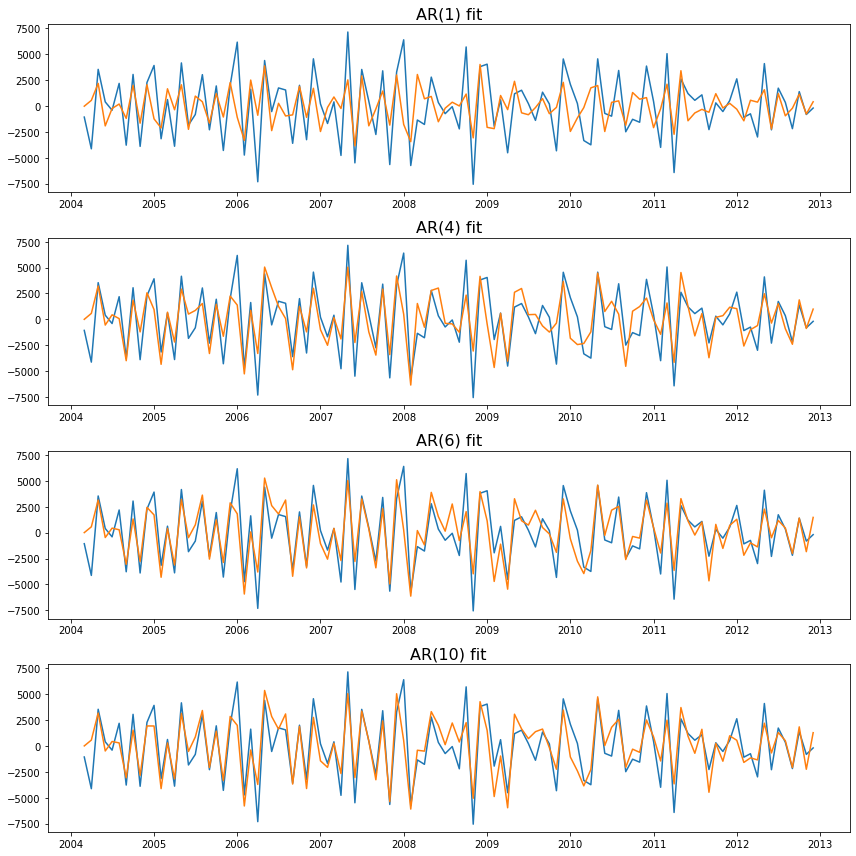

In [11]:
plt.figure(figsize = (12,12))

ar_ord = [1,4,6,10]
fitted_ar_dict = {}

for idx, ar_order in enumerate(ar_ord):
    
    #create model
    ar_model = ARMA(series, order = (ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_ar_dict[ar_order] = ar_model_fit
    
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title("AR(%s) fit"%ar_order,fontsize = 16)
    
plt.tight_layout()

In [12]:
## Which Model should we pick?

# AIC & BIC

### AIC
The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data.

### BIC

Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models. ... BIC has been widely used for model identification in time series and linear regression. It can, however, be applied quite widely to any set of maximum likelihood-based models.

# Each model has:
### a log likelihood ($l$)
### a number of parameters ($k$)
### a number of samples used for fitting ($n$)

## AIC = 2$k$ - 2$l$
**Lower AIC via higher log likelihood or less parameters**

## BIC = $\ln(n)k$ - 2$l$
**Lower BIC via higher log likelihood or less parameters or less samples used in fitting**


In [13]:
# AIC comparision

for ar_order in ar_ord:
    print("AIC for AR(%s): %s"%(ar_order,fitted_ar_dict[ar_order].aic))

AIC for AR(1): 1980.8563115130303
AIC for AR(4): 1927.4507590630228
AIC for AR(6): 1899.630265954521
AIC for AR(10): 1902.264791209589


In [14]:
# BIC comparision

for ar_order in ar_ord:
    print("BIC for AR(%s): %s"%(ar_order, fitted_ar_dict[ar_order].bic))

BIC for AR(1): 1988.8466287953665
BIC for AR(4): 1943.4313936276951
BIC for AR(6): 1920.9377787074177
BIC for AR(10): 1934.2260603389338


### Based on AIC and BIC AR(6) is the best fitted model